# Tensors

## Warm-up : numpy


In [0]:
import numpy as np

In [0]:
# N: batch size, D_in: input dimension, H: hidden dimension, D_out: out dimension

N, D_in, H, D_out = 64, 1000, 100, 10

In [0]:
# random input & output data 만들기 
x = np.random.rand(N, D_in)
y = np.random.rand(N, D_out)

In [0]:
# 임의로 초기화 된 weights
w1 = np.random.rand(D_in, H)
w2 = np.random.rand(H, D_out)

In [0]:
learning_rate = 1e-6

In [0]:
for t in range(500):
  # Forward pass to calculate y
  h = x.dot(w1)
  h_relu = np.maximum(h, 0)
  y_pred = h_relu.dot(w2)
  
  # calculate loss 
  loss = np.square(y_pred - y).sum()
  
  print(t, loss)
  
  # Backprop to compute gradients of w1, w2 with respect to loss
  grad_y_pred = 2.0*(y_pred - y)
  grad_w2 = h_relu.T.dot(grad_y_pred)
  grad_h_relu = grad_y_pred.dot(w2.T)
  grad_h = grad_h_relu.copy()
  grad_h[h < 0] = 0
  grad_w1 = x.T.dot(grad_h)
  
  # update weights 
  w1 += learning_rate*grad_w1
  w2 += learning_rate*grad_w2

0 98052571660.26782
1 4.961883992826491e+18
2 5.0542073118452655e+41
3 5.3414417570771536e+110
4 inf
5 inf
6 inf
7 inf
8 inf
9 inf
10 inf
11 inf
12 inf
13 inf
14 inf
15 inf
16 inf
17 inf
18 inf
19 inf
20 inf
21 inf
22 inf
23 inf
24 inf
25 inf
26 inf
27 inf
28 inf
29 inf
30 inf
31 inf
32 inf
33 inf
34 inf
35 inf
36 inf
37 inf
38 inf
39 inf
40 inf
41 inf
42 inf
43 inf
44 inf
45 inf
46 inf
47 inf
48 inf
49 inf
50 inf
51 inf
52 inf
53 inf
54 inf
55 inf
56 inf
57 inf
58 inf
59 inf
60 inf
61 inf
62 inf
63 inf
64 inf
65 inf
66 inf
67 inf
68 inf
69 inf
70 inf
71 inf
72 inf
73 inf
74 inf
75 inf
76 inf
77 inf
78 inf
79 inf
80 inf
81 inf
82 inf
83 inf
84 inf
85 inf
86 inf
87 inf
88

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  


 inf
89 inf
90 inf
91 inf
92 inf
93 inf
94 inf
95 inf
96 inf
97 inf
98 inf
99 inf
100 inf
101 inf
102 inf
103 inf
104 inf
105 inf
106 inf
107 inf
108 inf
109 inf
110 inf
111 inf
112 inf
113 inf
114 inf
115 inf
116 inf
117 inf
118 inf
119 inf
120 inf
121 inf
122 inf
123 inf
124 inf
125 inf
126 inf
127 inf
128 inf
129 inf
130 inf
131 inf
132 inf
133 inf
134 inf
135 inf
136 inf
137 inf
138 inf
139 inf
140 inf
141 inf
142 inf
143 inf
144 inf
145 inf
146 inf
147 inf
148 inf
149 inf
150 inf
151 inf
152 inf
153 inf
154 inf
155 inf
156 inf
157 inf
158 inf
159 inf
160 inf
161 inf
162 inf
163 inf
164 inf
165 inf
166 inf
167 inf
168 inf
169 inf
170 inf
171 inf
172 inf
173 inf
174 inf
175 inf
176 inf
177 inf
178 inf
179 inf
180 inf
181 inf
182 inf
183 inf
184 inf
185 inf
186 inf
187 inf
188 inf
189 inf
190 inf
191 inf
192 inf
193 inf
194 inf
195 inf
196 inf
197 inf
198 inf
199 inf
200 inf
201 inf
202 inf
203 inf
204 inf
205 inf
206 inf
207 inf
208 inf
209 inf
210 inf
211 inf
212 inf
213 inf
214 in

## PyTorch: Tensors

PyTorch의 가장 기본적인 개념인 **Tensor**에 대해서 알아보자. 

PyTorch에서의 tensor는 기본적으로 numpy의 그것과 같다. 

하지만 보여지는 것 뒤에서 Tensor를 통해서 이루어지는 computation의 graph, gradient 들을 기록하고 추적할 수 있다. 

In [0]:
import torch 

dtype = torch.float
device = torch.device('cpu')
# device = torch.device('cuda:0')

In [0]:
N, D_in, H, D_out = 64, 1000, 100, 10

In [0]:
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

In [0]:
w1 = torch.randn(D_in, H, device=device, dtype=dtype)
w2 = torch.randn(H, D_out, device=device, dtype=dtype)

In [0]:
learning_rate = 1e-6

In [0]:
for t in range(500):
  # forward
  h = x.mm(w1)
  h_relu = h.clamp(min=0)
  y_pred = h_relu.mm(w2)
  
  
  # loss
  loss = (y_pred-y).pow(2).sum().item()
  print(t, loss)
  
  # backprop
  grad_y_pred = 2.0*(y_pred - y)
  grad_w2 = h_relu.t().mm(grad_y_pred)
  grad_h_relu = grad_y_pred.mm(w2.t())
  grad_h = grad_h_relu.clone()
  grad_h[h < 0] = 0
  grad_w1 = x.t().mm(grad_h)
  
  # update
  w1 -= learning_rate*grad_w1
  w2 -= learning_rate*grad_w2

0 26688584.0
1 22232240.0
2 23078860.0
3 25756804.0
4 27239906.0
5 24827460.0
6 18682636.0
7 11637946.0
8 6386367.5
9 3389956.0
10 1898433.375
11 1181980.5
12 823827.875
13 627667.9375
14 507104.84375
15 424157.53125
16 362051.15625
17 312838.75
18 272539.34375
19 238813.59375
20 210225.171875
21 185799.28125
22 164768.6875
23 146587.046875
24 130790.9296875
25 117022.0859375
26 104956.5390625
27 94351.1484375
28 84997.90625
29 76725.890625
30 69389.359375
31 62867.3046875
32 57056.65625
33 51870.42578125
34 47228.26171875
35 43063.23046875
36 39322.1875
37 35953.96484375
38 32914.87890625
39 30167.419921875
40 27681.39453125
41 25427.21484375
42 23380.427734375
43 21519.146484375
44 19825.1484375
45 18280.646484375
46 16871.728515625
47 15584.6806640625
48 14407.4013671875
49 13328.912109375
50 12340.3203125
51 11433.2158203125
52 10600.33984375
53 9835.5693359375
54 9132.4150390625
55 8484.822265625
56 7888.03369140625
57 7338.21923828125
58 6830.51220703125
59 6361.455078125
60 5927

# Autograd

##PyTorch : Tensors and Autograd

앞선 예에서 우리는 신경망의 forward and backward pass를 수동으로 구현해야했다. 

소규모 네트워크에서 수동으로 처리하는 것은 큰 문제가 아닐 수 있지만 대규모의 복잡한 네트워크에서는 신속하게 처리하기 어렵다. 

다행히 우리는 자동 차별화 과정을 사용화에서 neural network에서 backpropagation 계산을 자동화할 수 있다. PyTorch의 **autograd package**는 이 기능을 정확하게 제공한다. autograd를 사용할 때 network의 **forward pass는 computational graph를 정의**한다. 이 **graph의 node**는 **tensor**가 되고, **edge**는 입력 tensor에서 출력 tensor를 생성하는 **함수**가 된다.  이 그래프를 통해서 backpropagation 하면 gradient를 쉽게 계산할 수 있다. 

이것은 복잡하게 들릴 수도 있지만 실제 사용은 간단하다. 각 tensor는 graph에서 node를 나타낸다. **'x'**가 **'x.requires_grad = True'**인 tensor이면, **'x.grad'**는 일부 스칼라 값에 대해서 **'x'의 gradient**를 보유하는 또 다른 **tensor**이다. 

PyTorch Tensors와 autograd를 사용하여 2개의 예층을 가지는 network를 구현해보자. 

In [0]:
import torch

dtype = torch.float
device = torch.device('cpu')
#device = torch.device('cuda:0')

In [0]:
N, D_in, H, D_out = 64, 1000, 100, 10

In [0]:
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

In [0]:
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

In [0]:
learning_rate = 1e-6

In [0]:
step = []
loss_value = []

In [24]:
for t in range(500):
  # Forward pass: Tensors에 대한 operation을 이용하여 predicted y 를 계산
  # 이것들은 Tensors를 사용하여 정방향 패스를 계산할 때 사용한 것과 정확히 
  # 동일한 작업이지만 역방향 패스를 수동으로 구현하지 않기 때문에 중간 값에 대한 
  # 참조를 일일이 유지할 필요가 없다.
  # h = x.mm(w1)
  # h_relu = h.clamp(min=0)
  # pred_y = h_relu.mm(w2)
  # ==>
  y_pred = x.mm(w1).clamp(min=0).mm(w2)
  
  # Tensors에 대한 작업을 이용해서 loss를 계산하고 출력하기
  loss = (y_pred - y).pow(2).sum()
  # 여기에서 출력된 loss 값은 (1,) 형태의 Tensor이다. 
  # 따라서 이것을 scalar 값으로 출력하기 위해서는 loss.item() 으로 출력해야 한다.
  print(t, loss.item())
  step.append(t)
  loss_value.append(loss.item())
  # autograd package를 사용하여 backpropagation을 계산한다. 
  # 이 호출은 requires_grad = True로 모든 Tensors에 대한 gradient를 계산한다.
  # 이 호출 후 w1.grad와 w2.grad는 각각 w1과 w2에 대한 손실의 gradient를 유지하는 
  # Tensors가 된다. 
  
  # grad_y_pred = 2.0*(y_pred - y)
  # grad_w2 = h_relu.t().mm(grad_y_pred)
  # grad_h_relu = grad_y_pred.mm(w2.t())
  # grad_h = grad_h_relu.clone()
  # grad_h[h < 0] = 0
  # grad_w1 = x.t().mm(grad_h)
  # ==>
  loss.backward()
  
  # 이제 gradient descent를 사용하여 weights를 update한다. 
  # weights는 'requires_grad=True'이기 때문에 수동으로 update를 하기 위해서는
  # torch.no_grad() 로 wrapping을 해야한다. autograd에서 이 과정을 추적 할 필요는 없다.
  
  # 또 다른 방법을 weight.data 및 weight.grad.data를 조작하는 것이다. 
  # tensor.data는 tensor와 저장공간을 공유하는 tensor이다. 하지만 histroy를 
  # 추적하지는 않는다. 
  # 이를 위해서 'torch.optim.SGD'를 사용하는 방법도 있다. 
  with torch.no_grad():
    w1 -= learning_rate*w1.grad
    w2 -= learning_rate*w2.grad
    
    # weight를 update한 후에 w1.grad와 w2.grad를 수동으로 zero initialize 해야한다. 
    # 그렇지 않으면 매 학습의 gradient 변화가 축적되어서 계속 update되기 때문에 
    # 정확한 학습을 기대하기 어렵다. 
    w1.grad.zero_()
    w2.grad.zero_()

0 37961928.0
1 32431922.0
2 27402262.0
3 20595654.0
4 13548281.0
5 8139665.5
6 4812663.5
7 2985523.75
8 2003029.375
9 1451862.5
10 1117165.25
11 895328.4375
12 736626.625
13 616666.5
14 522722.1875
15 447005.3125
16 384937.03125
17 333432.96875
18 290307.90625
19 253934.359375
20 223016.6875
21 196627.671875
22 174009.8125
23 154552.375
24 137711.625
25 123084.296875
26 110315.6953125
27 99129.96875
28 89307.6875
29 80647.0
30 72986.0625
31 66187.859375
32 60141.0703125
33 54748.8828125
34 49924.65625
35 45601.7109375
36 41717.703125
37 38221.86328125
38 35069.44921875
39 32225.375
40 29653.978515625
41 27321.71484375
42 25203.5546875
43 23276.078125
44 21519.689453125
45 19916.76171875
46 18451.95703125
47 17111.841796875
48 15883.8408203125
49 14757.1318359375
50 13722.15234375
51 12770.3505859375
52 11894.4658203125
53 11087.2431640625
54 10342.7099609375
55 9655.2958984375
56 9020.224609375
57 8432.4091796875
58 7888.02978515625
59 7383.455078125
60 6915.41455078125
61 6480.8583984

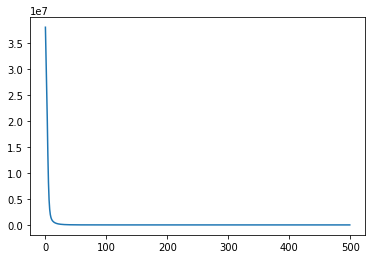

In [26]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.plot(step, loss_value)
plt.show()